Spotify Database


In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
data = pd.read_csv(r"C:\Users\sriram\Downloads\data.csv")

In [8]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [10]:
data.info

<bound method DataFrame.info of       Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0      0.010200         0.833       204600   0.434   
1              1      0.199000         0.743       326933   0.359   
2              2      0.034400         0.838       185707   0.412   
3              3      0.604000         0.494       199413   0.338   
4              4      0.180000         0.678       392893   0.561   
5              5      0.004790         0.804       251333   0.560   
6              6      0.014500         0.739       241400   0.472   
7              7      0.020200         0.266       349667   0.348   
8              8      0.048100         0.603       202853   0.944   
9              9      0.002080         0.836       226840   0.603   
10            10      0.057200         0.525       358187   0.855   
11            11      0.091500         0.753       324880   0.748   
12            12      0.253000         0.603       356973   0.434   
13

In [11]:
train , test = train_test_split(data, test_size =0.15)

In [12]:
print('Training size: {}; Test size: {}'.format(len(train) , len(test)))

Training size: 1714; Test size: 303


In [13]:
train.shape

(1714, 17)

In [14]:
test.shape

(303, 17)

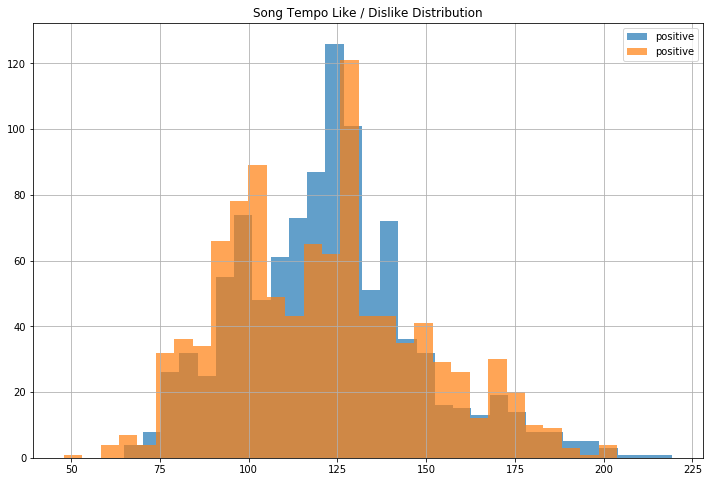

In [16]:
pos_tempo =data[data['target'] == 1]['tempo']
neg_tempo =data[data['target'] == 0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7 , bins = 30, label ='positive')
neg_tempo.hist(alpha = 0.7 , bins = 30, label ='positive')
plt.legend(loc ='upper right')